In [147]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kimku\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [149]:
df=pd.read_csv('ci-data.csv')
df.head()

,id,purchase_counts,purchase_sum,attribution_score,website_visits,website_behavior_classification,experience,active,characteristic_one,characteristic_two,characteristic_three,customer_journey_progress_program,remarks
0,5ca74cdcfc13ae60bd000097,5,44810.57,4,14,5,0.00,2.05,1,25,3,2,In hac habitasse platea dictumst. Etiam faucib...
1,5ca74cddfc13ae60bd0000f5,5,30612.91,9,7,9,0.00,4.94,2,25,3,1,Praesent blandit. Nam nulla. Integer pede just...
2,5ca74cddfc13ae60bd00010a,7,35655.59,3,26,5,0.00,3.61,1,26,1,1,Praesent id massa id nisl venenatis lacinia. A...
3,5ca74cdcfc13ae60bd000073,7,30139.24,7,9,4,0.01,4.44,2,26,3,1,In hac habitasse platea dictumst. Morbi vestib...
4,5ca74cdcfc13ae60bd000040,4,4501.13,3,10,1,0.02,4.51,1,25,3,1,Pellentesque at nulla. Suspendisse potenti. Cr...


# Exploring Customer Behaviour

In [150]:
df.columns

Index(['id', 'purchase_counts', 'purchase_sum', 'attribution_score',
       'website_visits', 'website_behavior_classification', 'experience',
       'active', 'characteristic_one', 'characteristic_two',
       'characteristic_three', 'customer_journey_progress_program', 'remarks'],
      dtype='object')

In [151]:
df.shape

(400, 13)

In [152]:
df.describe()

,purchase_counts,purchase_sum,attribution_score,website_visits,website_behavior_classification,experience,active,characteristic_one,characteristic_two,characteristic_three,customer_journey_progress_program
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000
mean,4.047500,24631.522625,5.947500,16.775000,6.340000,0.495700,3.085650,1.51250,25.09750,3.892500,5.387500
std,1.998808,14240.431535,3.909342,9.204411,3.392369,0.295642,1.151398,0.50047,0.98764,2.021425,2.925533
min,1.000000,48.130000,0.000000,1.000000,1.000000,0.000000,1.010000,1.00000,22.00000,1.000000,0.000000
25%,2.000000,12235.735000,2.000000,9.000000,3.750000,0.240000,2.115000,1.00000,25.00000,2.000000,3.000000
50%,4.000000,25002.425000,6.000000,16.000000,6.000000,0.470000,3.160000,2.00000,25.00000,4.000000,5.000000
75%,6.000000,36221.350000,9.000000,25.000000,9.000000,0.742500,4.120000,2.00000,26.00000,6.000000,8.000000
max,7.000000,49970.640000,12.000000,32.000000,12.000000,1.000000,5.000000,2.00000,28.00000,7.000000,10.000000


(array([81., 23., 24., 23., 30., 56., 41., 32., 20., 70.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <a list of 10 Patch objects>)

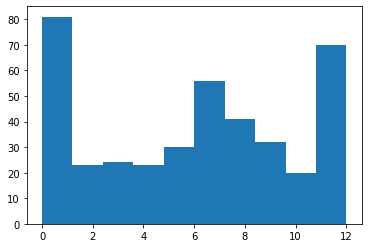

In [153]:
plt.hist(df.attribution_score)

Understanding where the strong data-driven relationships are, and knowing how to spot them can help you to control the drivers for business performance. Regression analysis can help identify and quantify the relationships in the customer data.

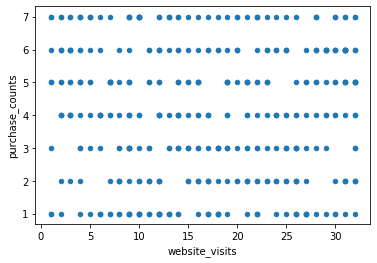

In [181]:
df.plot.scatter(x='website_visits',y='purchase_counts')

In [155]:
df.corr()

,purchase_counts,purchase_sum,attribution_score,website_visits,website_behavior_classification,experience,active,characteristic_one,characteristic_two,characteristic_three,customer_journey_progress_program
purchase_counts,1.000000,0.114807,-0.042659,-0.004049,-0.046742,-0.040072,0.037639,-0.094548,-0.006161,0.048409,-0.012585
purchase_sum,0.114807,1.000000,-0.049966,-0.069247,-0.038276,0.025457,-0.034714,-0.056691,-0.065040,-0.005819,-0.002640
attribution_score,-0.042659,-0.049966,1.000000,-0.019553,0.017413,0.000997,-0.037774,0.052216,-0.029829,-0.074929,-0.025171
website_visits,-0.004049,-0.069247,-0.019553,1.000000,-0.026279,-0.053223,0.022142,0.017478,0.005452,-0.017198,-0.039103
website_behavior_classification,-0.046742,-0.038276,0.017413,-0.026279,1.000000,0.036122,0.150231,-0.060081,0.013270,-0.032667,0.090230
experience,-0.040072,0.025457,0.000997,-0.053223,0.036122,1.000000,0.046166,-0.051469,-0.050147,-0.000608,0.873334
active,0.037639,-0.034714,-0.037774,0.022142,0.150231,0.046166,1.000000,0.099303,0.061071,-0.015051,0.050226
characteristic_one,-0.094548,-0.056691,0.052216,0.017478,-0.060081,-0.051469,0.099303,1.000000,-0.030360,0.005048,-0.038408
characteristic_two,-0.006161,-0.065040,-0.029829,0.005452,0.013270,-0.050147,0.061071,-0.030360,1.000000,0.022838,-0.065153
characteristic_three,0.048409,-0.005819,-0.074929,-0.017198,-0.032667,-0.000608,-0.015051,0.005048,0.022838,1.000000,-0.018790


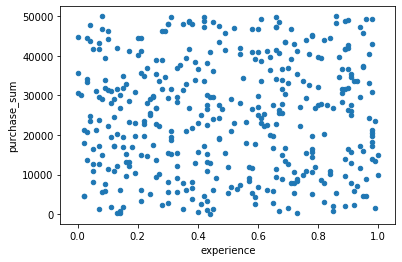

In [156]:
df.plot.scatter(x='experience', y='purchase_sum')

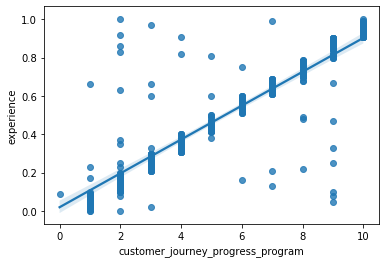

In [157]:
sns.regplot(x='customer_journey_progress_program',y='experience',data=df)

# Customer Journey Analysis by Linear Regression, Prediction model

In [158]:
X=df[['customer_journey_progress_program']]
Y=df['experience']


In [159]:
lm =LinearRegression()

In [160]:
lm.fit(X,Y)
lm.score(X,Y)

0.762711907750049

In [161]:
lm.predict(X)

array([0.19673501, 0.10847966, 0.10847966, 0.10847966, 0.10847966,
       0.10847966, 0.10847966, 0.28499035, 0.10847966, 0.10847966,
       0.10847966, 0.10847966, 0.10847966, 0.10847966, 0.10847966,
       0.10847966, 0.10847966, 0.10847966, 0.81452245, 0.10847966,
       0.10847966, 0.10847966, 0.10847966, 0.10847966, 0.10847966,
       0.10847966, 0.10847966, 0.10847966, 0.10847966, 0.10847966,
       0.10847966, 0.10847966, 0.10847966, 0.19673501, 0.10847966,
       0.81452245, 0.10847966, 0.10847966, 0.10847966, 0.10847966,
       0.02022431, 0.81452245, 0.19673501, 0.10847966, 0.19673501,
       0.19673501, 0.19673501, 0.19673501, 0.19673501, 0.19673501,
       0.19673501, 0.19673501, 0.19673501, 0.19673501, 0.19673501,
       0.19673501, 0.19673501, 0.19673501, 0.63801175, 0.19673501,
       0.19673501, 0.19673501, 0.19673501, 0.19673501, 0.19673501,
       0.19673501, 0.19673501, 0.19673501, 0.19673501, 0.19673501,
       0.5497564 , 0.19673501, 0.19673501, 0.19673501, 0.19673

# Customer Segmentation by Clustering

In [162]:
x=df[['purchase_sum','experience']]
y=df[['characteristic_one']]

In [163]:
y.columns=['Target']

In [164]:
colormap=np.array(['','pink','orange'])

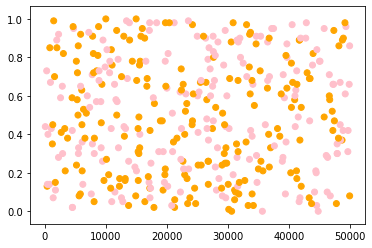

In [165]:
plt.scatter(x.purchase_sum,x.experience,c=colormap[y.Target])

In [166]:
model=KMeans(n_clusters=2)

In [167]:
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [168]:
model.labels_

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,

In [169]:
colormap=np.array(['pink','orange'])

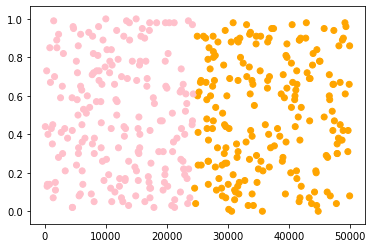

In [170]:
plt.scatter(x.purchase_sum, x.experience,c=colormap[model.labels_])

# Identifying Customer Advocate by NLP
Transforming qualitative data into quantitive data (to leverage customer feedback )

In [171]:
df.remarks.head()

0    In hac habitasse platea dictumst. Etiam faucib...
1    Praesent blandit. Nam nulla. Integer pede just...
2    Praesent id massa id nisl venenatis lacinia. A...
3    In hac habitasse platea dictumst. Morbi vestib...
4    Pellentesque at nulla. Suspendisse potenti. Cr...
Name: remarks, dtype: object

In [172]:
remarks=['This is the best bank on the planet.',
        'Lots of changes in their savings product. It is terrible',
        'The new app take some time to get used to, but it is good once you learn it']

In [173]:
remarks_token_counts=CountVectorizer(min_df=1,tokenizer=nltk.word_tokenize)

In [174]:
remarks_as_spars_vector=remarks_token_counts.fit_transform(remarks)

In [175]:
remarks_token_counts.vocabulary_

{'this': 26,
 'is': 10,
 'the': 24,
 'best': 4,
 'bank': 3,
 'on': 16,
 'planet': 18,
 '.': 1,
 'lots': 13,
 'of': 15,
 'changes': 6,
 'in': 9,
 'their': 25,
 'savings': 20,
 'product': 19,
 'it': 11,
 'terrible': 23,
 'new': 14,
 'app': 2,
 'take': 22,
 'some': 21,
 'time': 27,
 'to': 28,
 'get': 7,
 'used': 29,
 ',': 0,
 'but': 5,
 'good': 8,
 'once': 17,
 'you': 30,
 'learn': 12}

In [176]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [177]:
analyzer=SentimentIntensityAnalyzer()

In [178]:
def sentiment_analyser_score(sentence):
    score=analyzer.polarity_scores(sentence)
    print("{}{}".format(sentence,str(score)))
    

In [179]:
sentiment_analyser_score("best!")

best!{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6696}
